## Bike Assignment 
<h4>Purpose</h4>
<p>A bike sharing company wants to resume their services post pandemic effect. They want to understand the customer patterns after the pandemic and analyse different factors that helps to grow thier services and ear huge profits<p>

### Agenda for Bike Assignment
1. Read and understand the data
2. Clean the data for extra variables
3. Visualize the data with different variables
4. Prepare the data for the Model Analysis
5. Split the data to Test and Train data
6. Feature selection Techniques
7. Build a linear model
8. Residual Analysis
9. Evaluate the Model Data
9. Model Assesment and comparision

## 1. Read and Understand the Data

In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [328]:
bikeData = pd.read_csv("day.csv")
bikeDataLR = pd.read_csv("day.csv")

In [329]:
# Check the basic understanding of data using head 
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [330]:
# Also check the shape of the data
print(bikeData.shape)

(730, 16)


In [331]:
# describe the data and check the stats
bikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [332]:
# lets check for any null values
print("Null value in bike adat set = ",len(bikeData.columns[bikeData.isnull().all()].tolist()))

Null value in bike adat set =  0


In [333]:
# check for any 
bikeData[bikeData.duplicated()]

#Observation
#Looks none of rows have duplicate values

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


## 2. Clean the Data

In [334]:
# lets see if we can remove any unwanted columns
# Column "instant" has only indexed values, hence removing
# Column "dteday" which is alread covered by columns "yr" "month" and "weekday", hence removing
# As the target variable is column "cnt", we can remove the columns which are similar "casual" and "registered"
# so removing four columns "instant,dteday,casual,registered"
print(bikeData.shape)
bikeData.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
print(bikeData.shape)

(730, 16)
(730, 12)


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

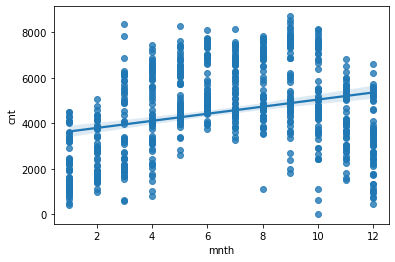

In [335]:
# Before proceeding for modelling, lets visualize the data and understand the liner regression
# lets see a corrleation between the target variable and the dependent variables
# lets check the correlation between month and cnt
sns.regplot(x="mnth",y="cnt",data=bikeData)

## Observations
## As we can see there is a weak correaltion between month and cnt

<AxesSubplot:xlabel='temp', ylabel='cnt'>

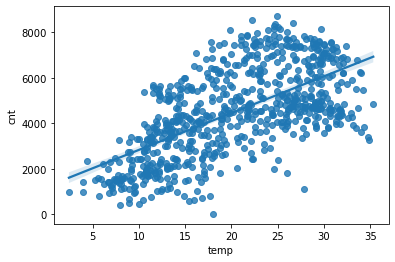

In [336]:
# lets check with climate
sns.regplot(x="temp",y="cnt",data=bikeData)

#Obesrvation
# looks like bikes are mostly rented with good weather

<Figure size 1080x3240 with 0 Axes>

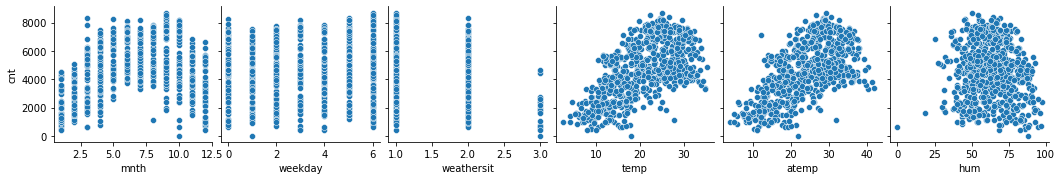

In [337]:
# Lets try to visualize the correlatrion between differnt dependent varibles with the target variable "cnt"
plt.figure(figsize = (15,45))
sns.pairplot(data=bikeData,x_vars=['mnth','weekday','weathersit','temp','atemp','hum'],y_vars='cnt')
plt.show()

## Observations
#As we can see there is a positive correaltion in temp atemp and hum variables, however we can see the
#actual correlation during modelling

<Figure size 1080x3240 with 0 Axes>

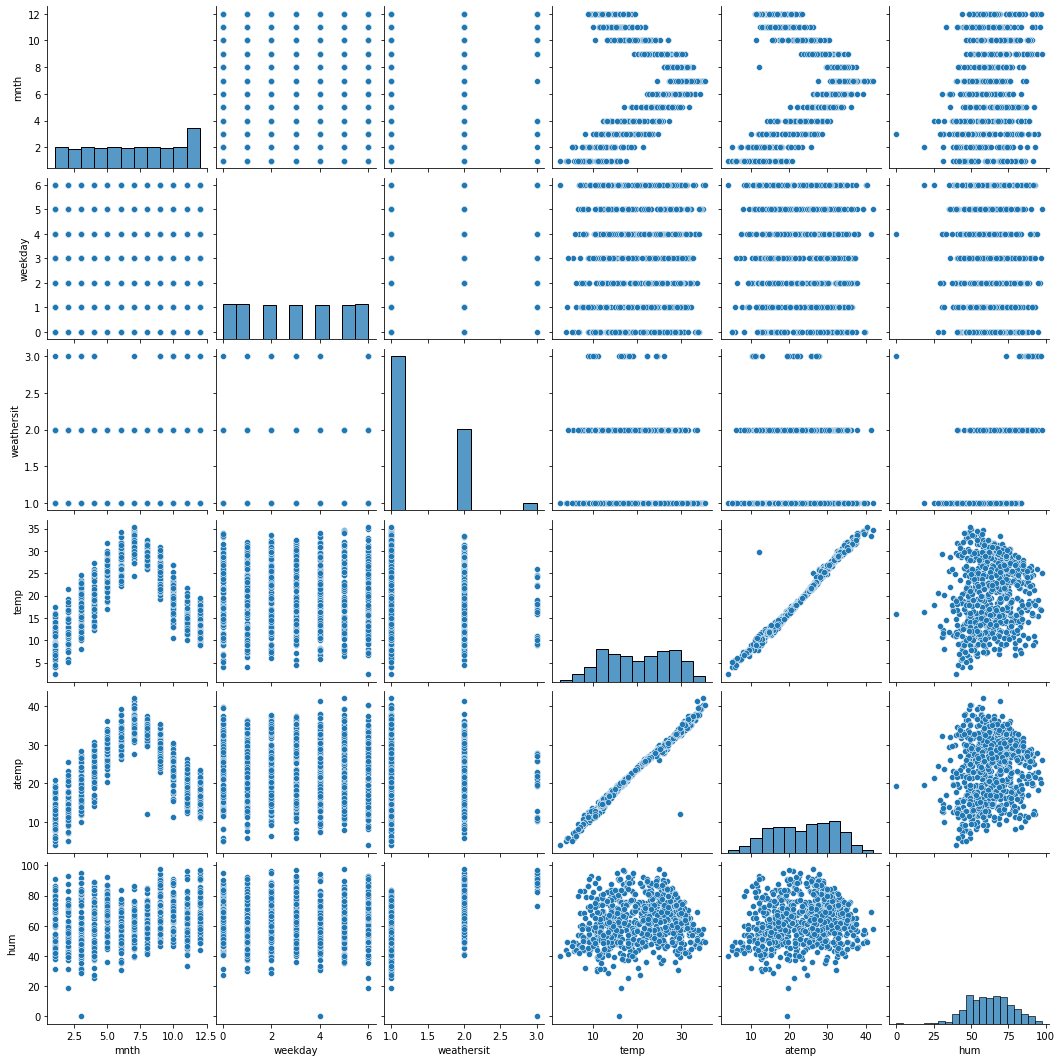

In [338]:
#lets also try to check correlation between different variables dependent variables with target 
plt.figure(figsize = (15,45))
sns.pairplot(data=bikeData,vars=['mnth','weekday','weathersit','temp','atemp','hum'])
plt.show()

# Observations

#As we can see the temp and atemp columns highly correlated with each other
# Also we can see high correlation between humidity and temp variables

## 3. Visualize the data

In [339]:
# lets compare and visualize the data with different dependent variables with target variable

#lets first convert numerical variables to categorical variables for better under standing of graphs

# let convert columns "season,month,weekday,weathersit"

bikeData.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikeData.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'},inplace = True)
bikeData.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bikeData.weathersit.replace({1:'good',2:'average',3:'bad',4:'worse'},inplace = True)

#lets see the data after modification
bikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,average,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,average,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


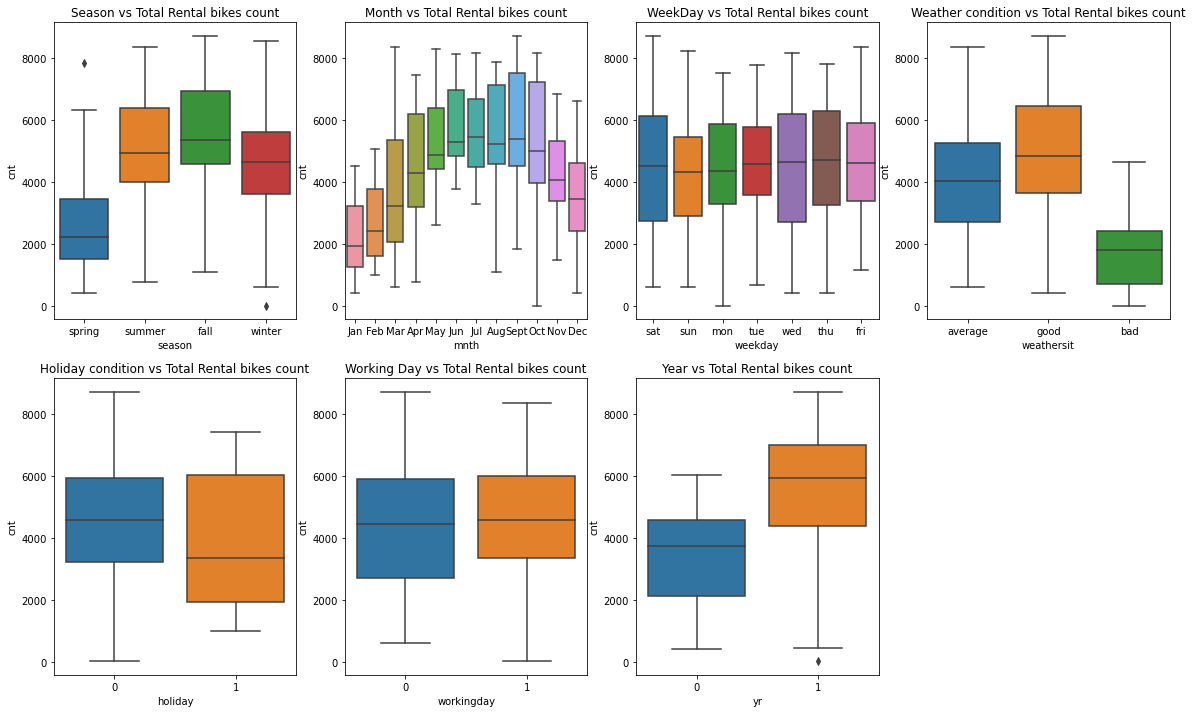

In [340]:
# lets apply a box plot to the "categorical columns" and colums which has only two values 
#and compare with target variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
plt.title('Season vs Total Rental bikes count')
sns.boxplot(x = 'season', y = 'cnt', data = bikeData)

plt.subplot(2,4,2)
plt.title('Month vs Total Rental bikes count')
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeData)

plt.subplot(2,4,3)
plt.title('WeekDay vs Total Rental bikes count')
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeData)

plt.subplot(2,4,4)
plt.title('Weather condition vs Total Rental bikes count')
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeData)

plt.subplot(2,4,5)
plt.title('Holiday condition vs Total Rental bikes count')
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeData)

plt.subplot(2,4,6)
plt.title('Working Day vs Total Rental bikes count')
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeData)

plt.subplot(2,4,7)
plt.title('Year vs Total Rental bikes count')
sns.boxplot(x = 'yr', y = 'cnt', data = bikeData)
plt.show()

# Observation
# - Most of the bikes are rented during fall season
# - Fall season from september to November, bikes rented are high in September
# - Most of the people opted rent bikes during working days
# - Most of the bikes rented in 2019
# - Bikes are mostly rented in Good weather


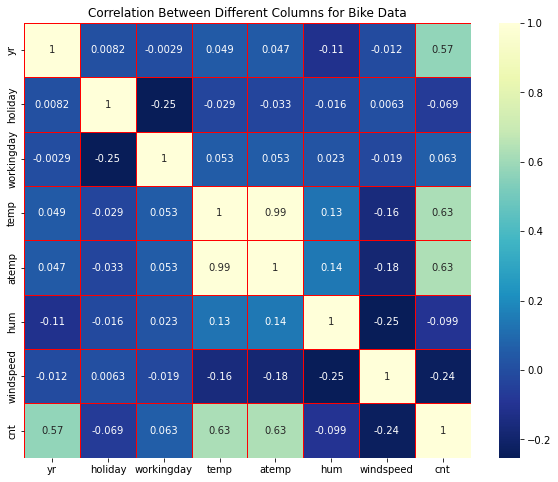

In [341]:
# finallly lets see the correlation between variables using heat map
plt.figure(figsize = [10,8])
sns.heatmap(data = bikeData.corr(), annot = True, cmap="YlGnBu_r",linecolor='r',linewidths="0.5")
plt.title('Correlation Between Different Columns for Bike Data')
plt.show()

# Understanding
# - As we can see that temp and atemp are highly correlated which results in Multicollinearity, 
#.  it mean change in one variable would change the other variable and the model results varies significantly
#   we will have to calculate the VIF and P value to see the further impact of these two vataibles
# 

## 4. Data Preparation for Model Analysis

In [342]:
# lets see if we need to create any dummy variables that helps for model to understand binary values
bikeData.head()
# Looks the columns season, mnth, weekday and weathersit has categoerical values where we can introduce dummy values

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,average,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,average,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [343]:
# create dummy variables for the columns
bikeData = pd.get_dummies(data=bikeData,columns=["season","mnth","weekday","weathersit"],drop_first=True)

print(bikeData.shape)

#Observation
# we can see the columns are increased from 12 to 30

(730, 30)


In [344]:
# lets see the columns pattern with dummy values
bikeData.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [345]:
# lets print and see the new columns values
bikeData.head()

# Observation
# we can see all the categorical columns are now replaced with dummy values which helps for our modelling
# and also called One Hot Encoding

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1


## 5 .Split the data to Test and Train data

In [346]:
# we need to split the data in to train and test data

np.random.seed(0)
df_train, df_test = train_test_split(bikeData, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.columns)

(510, 30)
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good'],
      dtype='object')


## 5.1 Scaling and Normalization

In [347]:
# Before we proceed for modelling, few columns like temp, atemp, hum and windspeed has high values which make the model
# learn and understand the problem

scaler = MinMaxScaler()

# we will also include the target variable in scaling as higher values may make the model unstable
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,0


In [348]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


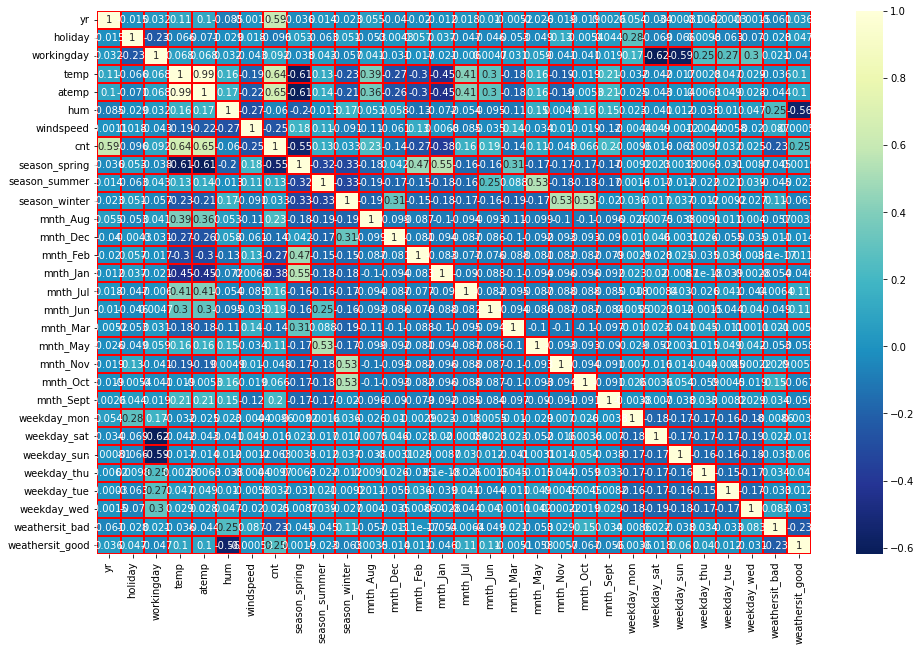

In [349]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu_r",linecolor='r',linewidths="0.2")
plt.show()

#Observation : We can see that count has high correlation with year(0.59), temp (0.64), a temp(0.65), lets try to compare with scatter plot

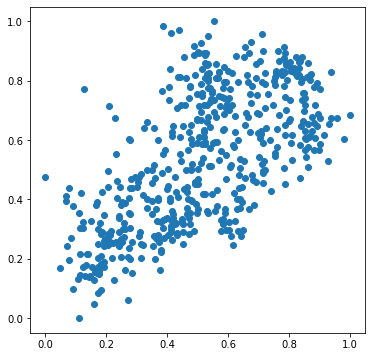

In [350]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.show()

We can see a little postive correlation, we will pick temp as variable

### Dividing into X and Y sets for the model building

In [351]:
y_train = df_train.pop('cnt')
X_train = df_train

print(y_train.shape)

(510,)


## 6. Feature selection Techniques

In [352]:
#Feature Selection is the method of reducing the input variable to your model by using only
#relevant data and getting rid of noise in data

#We are going to use two techniques for this

# 1. RFE ( Recursive Feature Elimination)
# 2. VIF (Vainace Inflation Factor)


## 6.1 RFE

In [353]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [354]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [355]:
# Lets select the top variables to participat ein modelling
# ref.support_ returns an array with boolean values to indicate whether an attribute was selected using RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 11),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 15),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1)]

In [356]:
# let see the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_sat', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')


In [357]:
# Let check columns that has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [358]:
X_train_rfe = X_train[col]

## 6.2 VIF Selection

#Les also calcualte the VIF, then proceed for evaluation

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [359]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [360]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIF
# common function for VIF value
def getVifValues(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))
getVifValues(col)

           Features    VIF
4               hum  24.60
3              temp  20.45
2        workingday   5.32
6     season_spring   5.06
5         windspeed   4.71
8     season_winter   3.84
14  weathersit_good   3.47
7     season_summer   2.98
0                yr   2.09
12      weekday_sat   1.98
9          mnth_Jan   1.68
10         mnth_Jul   1.60
11        mnth_Sept   1.39
1           holiday   1.18
13   weathersit_bad   1.15


Observation: We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default

## 5.1  1st Model

In [361]:
# Creating X_test dataframe with all the RFE selected variables


# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.31e-191
Time:                        02:52:29   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1932      0.040     

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Observation :All the column valus are less than 0.5 , that means they are significant and help in prediction

In [362]:
#Checking the VIF values
getVifValues(col)

           Features    VIF
4               hum  24.60
3              temp  20.45
2        workingday   5.32
6     season_spring   5.06
5         windspeed   4.71
8     season_winter   3.84
14  weathersit_good   3.47
7     season_summer   2.98
0                yr   2.09
12      weekday_sat   1.98
9          mnth_Jan   1.68
10         mnth_Jul   1.60
11        mnth_Sept   1.39
1           holiday   1.18
13   weathersit_bad   1.15


#Observation : Dropping hum column as it has high VIF value and check the next model

In [363]:
# drop the hum column from the data set
X_train_after_model_1 = X_train_rfe.drop(['hum'], axis = 1)
X_train_after_model_1.head()

,yr,holiday,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_sat,weathersit_bad,weathersit_good
653,1,0,1,0.509887,0.300794,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,1
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,0,0


## 5.2 2nd Model

In [364]:


# Add a constant
X_train_lm2 = sm.add_constant(X_train_after_model_1)

# Create a second fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

#Calculate VIF for new model
getVifValues(X_train_after_model_1.columns)


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.33e-189
Time:                        02:52:30   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0910      0.032     

## Observation: the temp value has drastically reduced to 7.83, let see further, as any VIF greater than 5 and less than 10 should nt be ignored

In [365]:
# we can drop column holiday as it has little high P value
X_train_after_model_2 = X_train_after_model_1.drop(['holiday'], axis = 1)
X_train_after_model_2.head()

,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_sat,weathersit_bad,weathersit_good
653,1,1,0.509887,0.300794,0,0,1,0,0,0,0,0,1
576,1,1,0.815169,0.264686,0,0,0,0,1,0,0,0,1
426,1,0,0.442393,0.255342,1,0,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.188475,0,1,0,0,0,0,1,0,0


## 5.3 3rd Model

In [366]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_after_model_2)

# Create a third fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

# Calculate VIF for new model
getVifValues(X_train_after_model_2.columns)

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.11e-189
Time:                        02:52:30   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0836      0.031     

## Observation : VIF value doesn't change much

In [367]:
# we can drop column mnth_Jan as it has little high P value
X_train_after_model_3 = X_train_after_model_2.drop(['mnth_Jan'], axis = 1)
X_train_after_model_3.head()

,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_sat,weathersit_bad,weathersit_good
653,1,1,0.509887,0.300794,0,0,1,0,0,0,0,1
576,1,1,0.815169,0.264686,0,0,0,1,0,0,0,1
426,1,0,0.442393,0.255342,1,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,1
482,1,0,0.395666,0.188475,0,1,0,0,0,1,0,0


## 5.4. 4th Model

In [368]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_after_model_3)

# Create a third fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

# Calculate VIF for new model
getVifValues(X_train_after_model_3.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.28e-189
Time:                        02:52:30   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0663      0.031     

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Observation : there is no chnage in VIF value, lets drop further values and check

In [369]:
# we can drop column mnth_Jul as it has little high P value
X_train_after_model_4 = X_train_after_model_3.drop(['mnth_Jul'], axis = 1)
X_train_after_model_4.head()

,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Sept,weekday_sat,weathersit_bad,weathersit_good
653,1,1,0.509887,0.300794,0,0,1,0,0,0,1
576,1,1,0.815169,0.264686,0,0,0,0,0,0,1
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,1
482,1,0,0.395666,0.188475,0,1,0,0,1,0,0


## 5.5 5th model

In [370]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_after_model_4)

# Create a third fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

# Calculate VIF for new model
getVifValues(X_train_after_model_4.columns)

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.86e-189
Time:                        02:52:30   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0588      0.031     

In [371]:
# we can drop column season_spring as it has little high P value
X_train_after_model_5 = X_train_after_model_4.drop(['season_spring'], axis = 1)
X_train_after_model_5.head()

,yr,workingday,temp,windspeed,season_summer,season_winter,mnth_Sept,weekday_sat,weathersit_bad,weathersit_good
653,1,1,0.509887,0.300794,0,1,0,0,0,1
576,1,1,0.815169,0.264686,0,0,0,0,0,1
426,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0,1
482,1,0,0.395666,0.188475,1,0,0,1,0,0


## 5.6 6th Model

In [372]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_after_model_5)

# Create a third fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

# Calculate VIF for new model
getVifValues(X_train_after_model_5.columns)

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.47e-188
Time:                        02:52:30   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0060      0.019     

## Observation : As we can see all the P values are ZERO above model i.e lr6, we can consider this model for prediction
## F-Statistics value of 254 (High F statistic value - Model is significant) 
## P-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant


In [373]:
# lets see the params of this model
lr6.params

const             -0.006022
yr                 0.233056
workingday         0.056323
temp               0.549936
windspeed         -0.155238
season_summer      0.087429
season_winter      0.131826
mnth_Sept          0.097236
weekday_sat        0.067688
weathersit_bad    -0.206674
weathersit_good    0.081347
dtype: float64

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [374]:
# lets see our final model data set
X_train_lm6.head()

,const,yr,workingday,temp,windspeed,season_summer,season_winter,mnth_Sept,weekday_sat,weathersit_bad,weathersit_good
653,1.0,1,1,0.509887,0.300794,0,1,0,0,0,1
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,1
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.188475,1,0,0,1,0,0


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

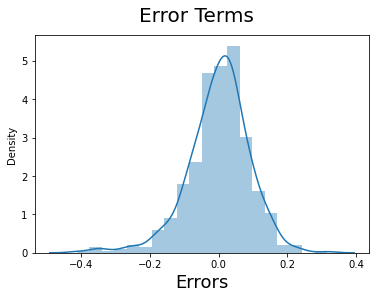

In [375]:
## calculat the erro terms which basically between the expected values at a particular time
# and the valyes that was actually observed at various stages .
y_train_pred = lr6.predict(X_train_lm6)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# Looks like the distirbution is normal

## Multi Colinearity


In [376]:
getVifValues(X_train_after_model_5.columns)

          Features   VIF
2             temp  5.38
1       workingday  3.92
3        windspeed  3.58
9  weathersit_good  2.69
0               yr  2.02
7      weekday_sat  1.66
4    season_summer  1.56
5    season_winter  1.39
6        mnth_Sept  1.20
8   weathersit_bad  1.12


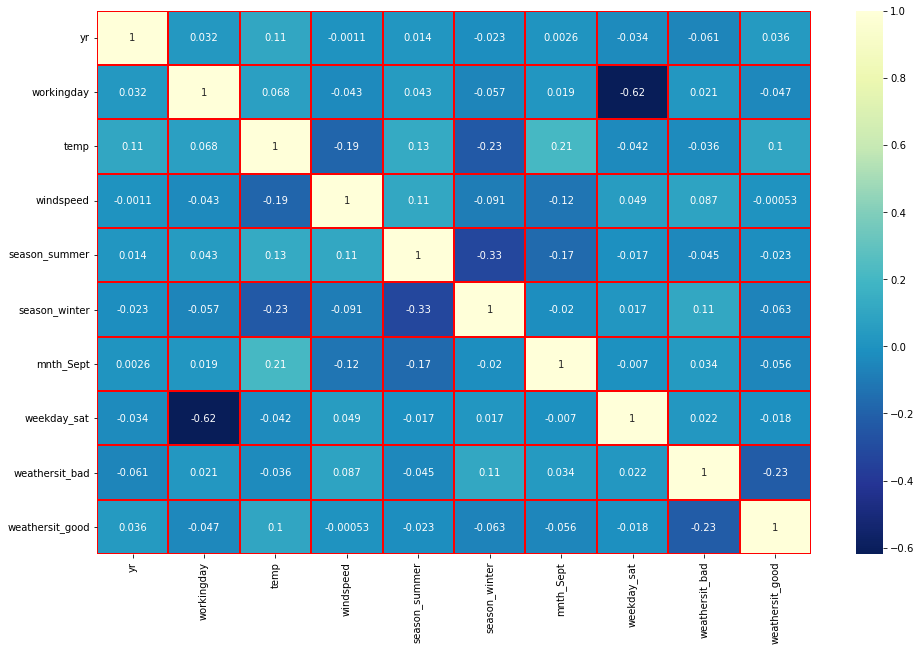

In [377]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_after_model_5.corr(), annot = True, cmap="YlGnBu_r",linecolor='r',linewidths="0.2")
plt.show()

## Observation : Looks like there is no mulit colinearity when comapre to previos heatmap

## Step 8. Making Predictions and Evaluate the data

## Apply the scaling on the test dataset

In [378]:

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,1


## Assign X and Y for test data

In [379]:
X_train_after_model_5.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Sept', 'weekday_sat', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [380]:
y_test = df_test.pop('cnt')
X_test = df_test

In [381]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_const = X_test[X_train_after_model_5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_const)

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [382]:
 #Making predictions
y_pred = lr6.predict(X_test_new)

In [383]:
## Lets calculate R score
r2_score = r2_score(y_test, y_pred)
round(r2_score,4)

0.7956

## Step 9. Model Evaluation

Text(0, 0.5, 'y_pred')

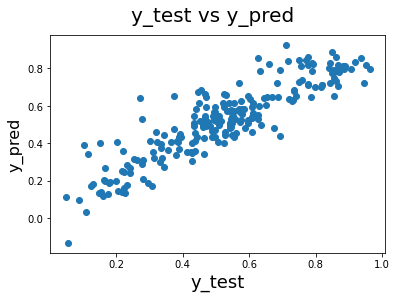

In [384]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [385]:
round(lr6.params,4)


const             -0.0060
yr                 0.2331
workingday         0.0563
temp               0.5499
windspeed         -0.1552
season_summer      0.0874
season_winter      0.1318
mnth_Sept          0.0972
weekday_sat        0.0677
weathersit_bad    -0.2067
weathersit_good    0.0813
dtype: float64

## Objective of Linear Regression:

The goal of linear regression is to perform predictive analytics and it is done by making the machine learn the science of generating a trained (best fitted) line that will very well generalize how new and unknown data (test set or new dataset) will be evaluated, and how the fitted line will be able to accurately estimate new or unknown datasets.

## Linear Regression can be written mathematically as follows:

Y = β0 + β1.X1 + β2. X2 + β3. X3 + β4. X4+ β5. X5 + β5. X6

#So Finally our line equation for bike data set :::
CountofBikes = -0.0060+ 0.2331 * yr + 0.0563 *workingday +0.5499 * temp -0.1552 *windspeed + 0.0874*season_summer +
                 0.1318*season_winter +0.0972 *mnth_Sept +0.0677*weekday_sat -0.2067*weathersit_bad +0.0813 *weathersit_good